In [60]:
import xgboost as xgb
import pprint as pp
from src.loadData import splitData, readLoadCurveOnetToDataframe,readHolidayToDataframe ,mergeHolidayAndLoadCurve, dateToFloat, readLoadCurveTwoToDataframe, readLoadCurveThreeToDataframe
from sklearn.metrics import mean_squared_error
from src.train import trainXGBRegressor, findBestParameter
from src.evaluation import evaluateModel

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
pathToModel = findBestParameter()

C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\src\loadData.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.dropna()
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Us

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1039
max_resources_: 84172
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 192
n_resources: 1039
Fitting 2 folds for each of 192 candidates, totalling 384 fits


C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:359

C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:359

MSE is 8543.695055062872


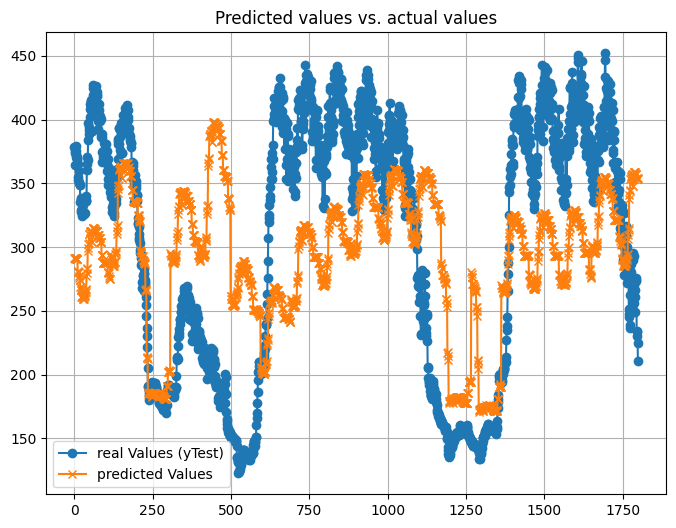

In [58]:
evaluateModel(pathToModel)

In [2]:
# loadCurveOne = readLoadCurveOnetToDataframe("../data/training_data_period_1.csv")
loadCurveTwo = readLoadCurveTwoToDataframe("../data/training_data_period_2.csv")
loadCurveThree = readLoadCurveThreeToDataframe("../data/training_data_period_3.csv")

holiday = readHolidayToDataframe("../data/holiday.csv")
data = mergeHolidayAndLoadCurve(holiday, loadCurveTwo)
data['electricLoad'] = data['electricLoad'].astype(float)

In [3]:
xTest, yTest , xTrain , yTrain = splitData(data,'electricLoad', 0.2 )


In [4]:
# define model
model = xgb.XGBRegressor(
    n_estimators=1500,
    max_depth=6,
    learning_rate=0.005,
    colsample_bytree=0.9,
    min_child_weight=4,
    tree_method='exact',
    eval_metric='mphe',
    subsample = 0.9 ,
    reg_alpha =0.5,
    reg_lambda =1.5
)

model.fit(xTrain, yTrain, verbose=True, eval_set= [(xTest, yTest)])

[0]	validation_0-mphe:11.82070


C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:359

[1]	validation_0-mphe:11.78612
[2]	validation_0-mphe:11.73970
[3]	validation_0-mphe:11.69263
[4]	validation_0-mphe:11.65424
[5]	validation_0-mphe:11.60573
[6]	validation_0-mphe:11.55933
[7]	validation_0-mphe:11.52670
[8]	validation_0-mphe:11.49777
[9]	validation_0-mphe:11.46417
[10]	validation_0-mphe:11.41847
[11]	validation_0-mphe:11.37460
[12]	validation_0-mphe:11.33139
[13]	validation_0-mphe:11.28552
[14]	validation_0-mphe:11.24836
[15]	validation_0-mphe:11.20349
[16]	validation_0-mphe:11.16080
[17]	validation_0-mphe:11.11627
[18]	validation_0-mphe:11.07445
[19]	validation_0-mphe:11.03138
[20]	validation_0-mphe:11.00020
[21]	validation_0-mphe:10.95684
[22]	validation_0-mphe:10.91456
[23]	validation_0-mphe:10.87989
[24]	validation_0-mphe:10.83656
[25]	validation_0-mphe:10.80562
[26]	validation_0-mphe:10.76381
[27]	validation_0-mphe:10.72947
[28]	validation_0-mphe:10.68822
[29]	validation_0-mphe:10.64846
[30]	validation_0-mphe:10.60825
[31]	validation_0-mphe:10.56753
[32]	validation_0

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mphe', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
predictedLabels = model.predict(xTest)

C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Philipp\OneDrive\Dokumente\GitHub\CaseStudiesOfAIImplementation\venv\lib\site-packages\xgboost\data.py:359

In [7]:
yTest.to_numpy()

array([46.67, 46.61, 46.16, ..., 67.17, 68.  , 66.5 ])

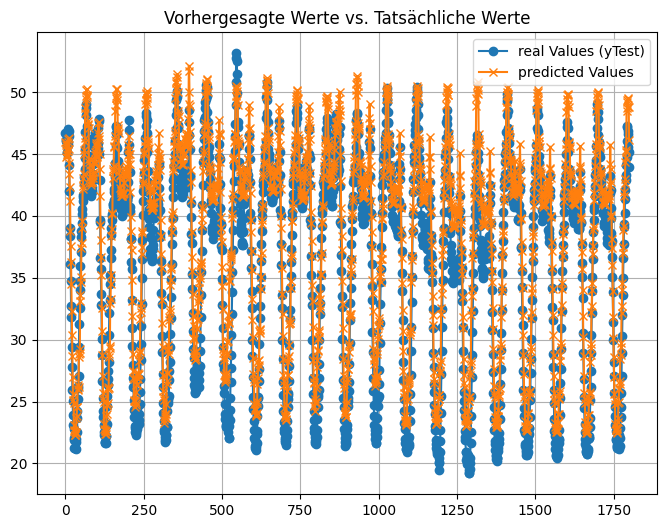

10.274885923101554

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Alternativ: Erstellen eines Liniendiagramms
plt.figure(figsize=(8, 6))
plt.plot(yTest.to_numpy()[0:1800], label='real Values (yTest)', marker='o')
plt.plot(predictedLabels[0:1800], label='predicted Values', marker='x')
plt.legend()
plt.title('Vorhergesagte Werte vs. Tatsächliche Werte')
plt.grid(True)
plt.show()
calculate_mse(yTest.to_numpy(),predictedLabels)

In [27]:
mse = mean_squared_error(predictedLabels, yTest.to_numpy())
print(mse)

10.274885923101554


In [9]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import make_scorer
param_grid = {
    'n_estimators': [500],
    'max_depth': [5, 7, 10],
    'learning_rate': [ 0.01],
    'colsample_bytree': [0.3,  0.9],
    'min_child_weight': [1, 4],
    'subsample': [0.6, 0.9],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [ 1.0, 1.5],
    'eval_metric':['rmse', 'mphe']
}
grid_search = HalvingGridSearchCV(
    model,
    param_grid,
    cv=2,  
    scoring=make_scorer(calculate_mse, greater_is_better=False),  # Benutzerdefinierter Scorer
    verbose=1
)
# Führen Sie die Gittersuche durch
# grid_search.fit(xTrain, yTrain)

# Ausgabe der besten Parameter
print('Best parameters found: ', grid_search.best_params_)

AttributeError: 'HalvingGridSearchCV' object has no attribute 'best_params_'

In [ ]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f'Mean CV Score: {mean_score:.2f}, Parameters: {params}')
print(max(cv_results['mean_test_score']))

In [ ]:
best_model = grid_search.best_estimator_

In [10]:
import tensorflow as tf
from tensorflow.keras import optimizers, models, layers
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [41]:
Nmodel = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(12,), name='input_layer'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])


Nmodel.compile(optimizer='adam',
              loss='mse')

Nmodel.fit(xTrain, yTrain, epochs=15, batch_size=32, validation_data=(xTest, yTest))
evaluation = Nmodel.evaluate(xTest, yTest)
print(f'Evaluation Loss: {evaluation}')


Epoch 1/15
2631/2631 [==============================] - 17s 6ms/step - loss: 84.3903 - val_loss: 42.0987
Epoch 2/15
2631/2631 [==============================] - 25s 9ms/step - loss: 55.9319 - val_loss: 36.0814
Epoch 3/15
2631/2631 [==============================] - 20s 8ms/step - loss: 41.5213 - val_loss: 40.2047
Epoch 4/15
2631/2631 [==============================] - 25s 9ms/step - loss: 32.3052 - val_loss: 33.2924
Epoch 5/15
2631/2631 [==============================] - 15s 6ms/step - loss: 29.3973 - val_loss: 45.6692
Epoch 6/15
2631/2631 [==============================] - 13s 5ms/step - loss: 28.7438 - val_loss: 35.5625
Epoch 7/15
2631/2631 [==============================] - 22s 8ms/step - loss: 27.4007 - val_loss: 17.7440
Epoch 8/15
2631/2631 [==============================] - 18s 7ms/step - loss: 26.5307 - val_loss: 33.3618
Epoch 9/15
2631/2631 [==============================] - 11s 4ms/step - loss: 25.8810 - val_loss: 28.1173
Epoch 10/15
2631/2631 [==============================] 

In [31]:
Nmodel = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(12,), name='input_layer'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='relu')
])

Nmodel.compile(optimizer='adam',
              loss='mse')

Nmodel.fit(xTrain, yTrain, epochs=10, validation_data=(xTest, yTest))
Nmodel.evaluate(xTest, yTest)


Epoch 1/10
2631/2631 [==============================] - 11s 4ms/step - loss: 88.1116 - val_loss: 58.1890
Epoch 2/10
2631/2631 [==============================] - 18s 7ms/step - loss: 56.5714 - val_loss: 66.0697
Epoch 3/10
2189/2631 [=======================>......] - ETA: 2s - loss: 54.5006

KeyboardInterrupt: 

In [42]:
pred = Nmodel.predict(xTest)

658/658 [==============================] - 2s 2ms/step


In [43]:
len(pred)

21043

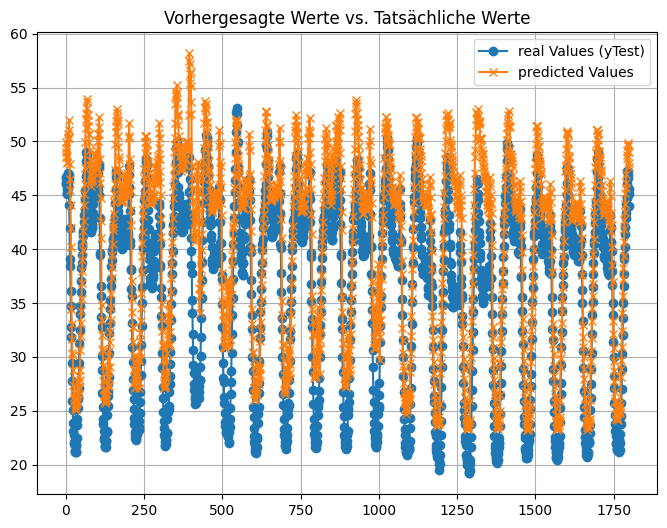

25.844659340288022


In [44]:
plt.figure(figsize=(8, 6))
plt.plot(yTest.to_numpy()[0:1800], label='real Values (yTest)', marker='o')
plt.plot(pred[0:1800], label='predicted Values', marker='x')
plt.legend()
plt.title('Vorhergesagte Werte vs. Tatsächliche Werte')
plt.grid(True)
plt.show()
mse = mean_squared_error(pred, yTest.to_numpy())
print(mse)